# Introduction to digital forensics of cybercrime
## Assignment 3 - DDoS attack investigation
**Quick Disclaimer:** The Widgets, Table of Contents and References sadly do not work on Github. If you want to make use of these features, please clone the repository and run the instructions in the README.
### Project Group 4
    Loek van der Gugten 1975331
    Reinier de Ridder   1701134
    Frank Nijeboer      2011972
    Jos Bartels         1941224
    Dionne Kingma       2419874
    Hanneke Verschoor   1954334

<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>

## Introduction
DDoS attacks are in the news more and more regularly these days. Banks get attacked, teens performing them are arrested and prosecuted and possible measures about these kind of attacks are discussed. DDoS stands for Distributed Denial-of-Service. What happens during a DDoS attack is that a system is flooded with traffic, overloading the system and temporarily making it unavailable to its users (Imperva, n.d.). While performing such an attack can be relatively easy, for example by using a booter website, it is not without any risk. These kinds of attacks leave traces ('fingerprints') that can be analyzed. What kind of data an attack trace specifically entails is not known to us, but it sparked our interest into investigating this. Can the devices used in an attack be traced? Is it possible to see how many of them were used in the attack? And what other relevant information does an attack trace entail? The goal of this research is to get a better understanding of DDoS attacks in general and to get some insight into what information can be used to identify or maybe even trace a DDoS attack. To get a better understanding of this, an attack trace provided by the University of Twente will be used. An interesting detail about this particular attack trace is the fact that the students performed a local DDoS attack themselves on their lecturer. 


DDoS Attack Types & Mitigation Methods | Imperva. (n.d.). Retrieved October 10, 2019, from     https://www.imperva.com/learn/application-security/ddos-attacks/

## Methodology
During the lecture, a local DDoS attack was performed on a computer of the lecturer (Jair Santana). The lecturer recorded the traffic to his machine using [Wireshark](https://www.wireshark.org/). Wireshark is a network packet analyzer that is used by, among others, network administrators and network security engineers to analyze what happens on a network. It does this by capturing the traffic on that network in the form of packets. Wireshark will present these packets that are captured in as much detail as possible. <cite data-cite="7233958/2QFFCFDH"></cite> 

The packets that were captured during the lecture are saved in a '.pcapng' file ('for_the_afternoon.pcapng'), for the students to analyze. This file can be loaded in the Wireshark program to do analysis there, but there it is also possible to generate a '.csv' file from the '.pcapng' file. CSV stands for 'Comma-separated values' and is a format used to easily transfer data between different protocols. Some banks in the Netherlands, Rabobank for example, also use this format whenever their customers want to download transaction data.<cite data-cite="7233958/R64I25J8"></cite> This was done for this Jupyter Notebook as well: columns were added to deliver more information for analysis and the .csv file was generated. The generated file is called 'for_the_afternoon.csv'.

To analyze the data in this Jupyter Notebook, the [pandas](https://pandas.pydata.org/) python module is used. Pandas is an open source module that is widely used to perform data analysis in all kinds of fields of science. To visualize the data [matplotlib](https://matplotlib.org/) is used. Matplotlib is a python module capable of plotting 2D graphs based on data in the Dataframe objects from pandas. 

## Preprocessing the data
Before starting to analyze the data using pandas and matplotlib the data must be preprocessed to allow for easier plotting and analysis. This will be done in steps:

### Step 1: Generate a CSV file
Columns must be added to Wireshark to deliver more information in the '.csv' file that is used to generate a pandas Dataframe later on. The fields that will be added are: 
* 'Source Port': The port that was used by the sender of the packet. Wireshark field is 'Src port (resolved)'
* 'Destination Port': The port that received the packet. Wireshark field is 'Dest port (resolved)'
* 'Vendor': The Vendor of the device that sent the packet. This vendor is based on the MAC Address that was used in the packet and automatically determined by Wireshark. Wireshark field is 'Hw src addr (resolved)'
* 'Source Mac Address': The MAC Address of the sender of a packet. Wireshark field is 'Hw src addr (unresolved)'
* 'TCP Flags': The flags that are used in the message. This is represented as a number starting with 0x. Wireshark field is 'tcp.flags'.
To add a column in Wireshark, we simply clicked on an existing column and clicked 'Column Preferences' to add, remove and edit columns in Wireshark.

Now we can generate the '.csv' file by clicking on ```File > Export Packet Dissections > As CSV...```. The '.csv' file is already included in this repository and will be used later on in this notebook.

### Step 2: Import Pandas and Matplotlib
Now that the '.csv' file is generated, python code can be written to import the data into this notebook. The first step is to import the modules that will be used for the analysis.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### Step 3:  Load the CSV inside a Dataframe
The data from the '.csv' file will be stored in the variable 'df'.

In [2]:
df_file = "for_the_afternoon.csv"
df = pd.read_csv(df_file, index_col="No.")

### Step 4: Make the Flags Column Readable
The column 'TCP Flags' is not readable for humans when it is exported from Wireshark. Therefore a dictionary will be made that maps the code for a flag to a string representing the name of that TCP flag.

In [3]:
tcp_flags = {
    '0x002': 'SYN',
    '0x018': '(PSH, ACK)',
    '0x010': 'ACK',
    '0x012': '(SYN, ACK)',
    '0x014': '(RST, ACK)',
    '0x004': 'RST',
    '0x011': '(FIN, ACK)',
    '0x019': '(FIN, PSH, ACK)'
}
df['TCP Flags'] = df['TCP Flags'].apply(tcp_flags.get)

### Step 5: Remove the Numbers from the Vendor Column
The Vendor column, as it now is, shows the vendor of a device based on the Mac Address, followed by some string. Since there is no real need for this string after the vendor name, this will be removed from all entries in this column. 

In [4]:
df['Vendor'] = df['Vendor'].apply(lambda x: x.split("_")[0])

## Results
The preprocessing is done, meaning that calculating the results can start. Below, some paragraphs can be found that analyze different parts of the data.

### Entire Trace
First, some analysis will be done on the dataset as a whole, to determine how much traffic has been captured. Also, the duration of the entire capture can create some interesting insights that will show why this capture was unusual. 

#### Records
The first value that might be interesting is the amount of records in the capture file. This indicates the size of the attack. 
The amount of records is determined by getting the length of the Dataframe.

In [5]:
print("There are {} records in the entire trace.".format(len(df.index)))
df

There are 117333 records in the entire trace.


,Time,Source IP,Destination IP,Protocol,Length,Info,Source Port,Destination Port,Vendor,Source Mac Address,TCP Flags
No.,,,,,,,,,,,
1,0.000000,192.168.0.107,192.168.0.255,UDP,305,59199 > 54915 Len=263,59199.0,54915.0,IntelCor,a0:88:69:e0:2d:d3,None
2,0.102253,192.168.0.107,192.168.0.255,UDP,305,54915 > 54915 Len=263,54915.0,54915.0,IntelCor,a0:88:69:e0:2d:d3,None
3,0.244179,192.168.0.100,192.168.0.2,DNS,81,Standard query 0x4bf7 A p68-caldav.icloud.com,61098.0,53.0,Apple,8c:85:90:56:69:c0,None
4,0.305297,IntelCor_6c:2f:50,Broadcast,ARP,42,Who has 192.168.0.2? Tell 192.168.0.106,NaN,NaN,IntelCor,cc:3d:82:6c:2f:50,None
5,0.308302,192.168.0.2,192.168.0.100,ICMP,109,Destination unreachable (Port unreachable),61098.0,53.0,D-LinkIn,3c:1e:04:12:86:d8,None
...,...,...,...,...,...,...,...,...,...,...,...
117329,71.852720,192.168.0.100,192.168.0.121,TCP,66,"80 > 64484 [SYN, ACK] Seq=0 Ack=1 Win=65535 ...",80.0,64484.0,Apple,8c:85:90:56:69:c0,"(SYN, ACK)"
117330,71.852737,192.168.0.100,192.168.0.121,TCP,66,"80 > 64463 [SYN, ACK] Seq=0 Ack=1 Win=65535 ...",80.0,64463.0,Apple,8c:85:90:56:69:c0,"(SYN, ACK)"
117331,71.852776,192.168.0.100,192.168.0.121,TCP,66,"80 > 64464 [SYN, ACK] Seq=0 Ack=1 Win=65535 ...",80.0,64464.0,Apple,8c:85:90:56:69:c0,"(SYN, ACK)"


#### Duration
To identify the duration of the entire trace, the 'Time' column is used. The maximum value in this column identifies the duration of the trace. 

In [6]:
print("The duration of the trace is {} seconds.".format(df['Time'].max()))

The duration of the trace is 71.87289100000001 seconds.


Combining the duration and the amount of packets, the conclusion can be drawn that this is a case of unusually high network traffic. There are 117333 packets sent to and from a machine in a relative short timespan. This suggests that there is a possible DDoS attack going on on the system at the time of the capture.

#### When the attack started
What could help to determine the fingerprint of the attack is knowing when the DDoS attack started. For this, it is useful to study a graph that shows the amount of network traffic that was happening per timestamp in this capture. This is done in pandas by first casting all the 'Time' Columns to integers instead of doubles. After that, there is the option to group on this time value and sum up all the 'Length' columns for every time value. Now a graph can be made that will show the amount of MB/s at a given time. 

Below a graph will be shown where the data rate will be plotted at each second in the capture.

**Note**: The graph that is made below is an interactive one. There is a slider that represents the upper limit of the x-axis of this graph. Changing this value and clicking on the 'Generate' button will generate a new graph with a new upper time limit. 

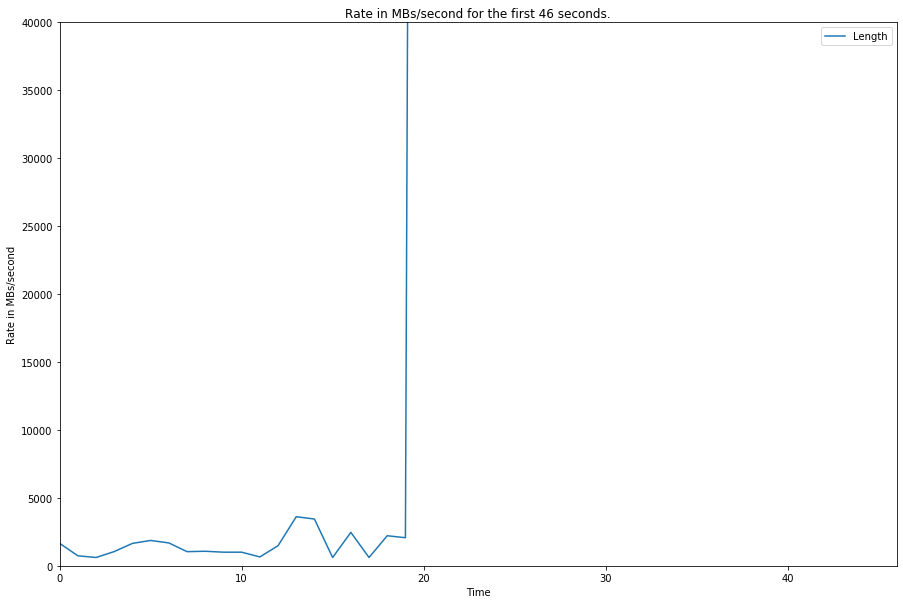

IntSlider(value=46, max=72, min=2)

Button(description='Generate', style=ButtonStyle())

In [7]:
import ipywidgets as widgets
from IPython.display import clear_output

class DataClass:
    def __init__(self):
        self.upper = 20
        
data_class = DataClass()    

slider = widgets.IntSlider(min=2, max=72, value=data_class.upper)
button = widgets.Button(description='Generate')

def graph(i=None):
    clear_output()
    entries = df
    entries['Time'] = entries['Time'].apply(int)
    entries = entries.loc[df['Time'] <= data_class.upper]
    entries.groupby(['Time']).sum().plot.line(y='Length', figsize=(15,10))
    plt.ylabel('Rate in MBs/second')
    plt.title('Rate in MBs/second for the first {} seconds.'.format(data_class.upper))
    plt.ylim(bottom=0, top=40000)
    plt.show()
    display(slider, button)
    
def change_value(i):
    data_class.upper = i['new']


slider.observe(change_value, names='value')
button.on_click(graph)
graph()

The data in the plot above shows a drastic increase in the data rate after 19 seconds. With the slider set to a value higher than 20, it is clear that this increase is massive. The rate does not fit on the y-axis anymore and stays there until the end of the capture. This gives a clear indication about the timestamps of the attack.

### Characteristics of the Attack
Some characteristics of the attack that were determined by looking at the packets that occured often in Wireshark are:
* Destination IP is 192.168.0.100. This is the victim of the attack that the classroom performed a DDoS attack on. 
* Encapsulation type: Ethernet (1). This means that all attacks on the victim happened over his Ethernet connection.
* The attack happened on Oct 7 2019, between 11:04 and 11:06.
* TCP protocol is used. This indicates that the DDoS attack was done using TCP flood.
* TCP destination port is 80. This is the open port of the victim.
* Only IPv4 is used


### How many records are part of the attack?
Below the records that are part of the attack are listed. This Dataframe is filterd on packets where the destination IP is 192.168.0.100 (the target/victim) and the protocol is TCP. 

In [8]:
attack_entries = df.loc[df['Destination IP'] == "192.168.0.100"]
attack_entries = attack_entries.loc[attack_entries['Protocol'] == 'TCP']
print("There are {} records part of the attack.".format(len(attack_entries.index)))
attack_entries

There are 67177 records part of the attack.


,Time,Source IP,Destination IP,Protocol,Length,Info,Source Port,Destination Port,Vendor,Source Mac Address,TCP Flags
No.,,,,,,,,,,,
129,19,192.168.0.112,192.168.0.100,TCP,66,33600 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...,33600.0,80.0,IntelCor,ac:ed:5c:b9:d8:a9,SYN
131,19,192.168.0.112,192.168.0.100,TCP,54,33600 > 80 [ACK] Seq=1 Ack=1 Win=65536 Len=0,33600.0,80.0,IntelCor,ac:ed:5c:b9:d8:a9,ACK
133,19,192.168.0.112,192.168.0.100,TCP,80,"33600 > 80 [PSH, ACK] Seq=1 Ack=1 Win=65536 ...",33600.0,80.0,IntelCor,ac:ed:5c:b9:d8:a9,"(PSH, ACK)"
137,19,192.168.0.112,192.168.0.100,TCP,54,33600 > 80 [ACK] Seq=27 Ack=408 Win=65280 Len=0,33600.0,80.0,IntelCor,ac:ed:5c:b9:d8:a9,ACK
138,20,192.168.0.112,192.168.0.100,TCP,80,"33600 > 80 [PSH, ACK] Seq=27 Ack=408 Win=652...",33600.0,80.0,IntelCor,ac:ed:5c:b9:d8:a9,"(PSH, ACK)"
...,...,...,...,...,...,...,...,...,...,...,...
117314,71,192.168.0.121,192.168.0.100,TCP,66,64483 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...,64483.0,80.0,IntelCor,7c:5c:f8:89:d8:c5,SYN
117315,71,192.168.0.121,192.168.0.100,TCP,66,64462 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...,64462.0,80.0,IntelCor,7c:5c:f8:89:d8:c5,SYN
117316,71,192.168.0.121,192.168.0.100,TCP,66,64484 > 80 [SYN] Seq=0 Win=64240 Len=0 MSS=1...,64484.0,80.0,IntelCor,7c:5c:f8:89:d8:c5,SYN


The above code shows that there are 67177 packets in the attack, as it is filtered right now. As a reminder: the total amount of packets in the entire capture file is 117333. This means that there are still 117333 - 67177 = 50156 packets that are not part of the attack. These 'non-attack' packets could be the answers that the victim is able to send to the attackers. It might be useful to analyze what these 'non-attack' packets are and figure out the reason why there are so many of them. The below data shows a snippet of the data that was excluded by filters above and considered 'non-attack'.

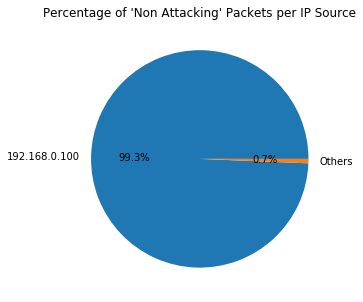

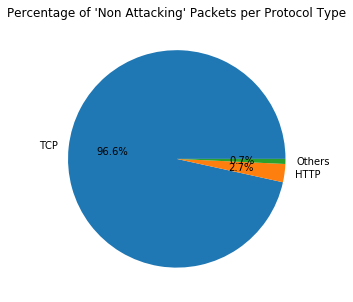

In [9]:
non_attackers = df.loc[df['Destination IP'] != "192.168.0.100"]
not_80 = non_attackers['Source IP'].value_counts().sort_values(ascending=False).index[1:]
non_attackers.replace(not_80, 'Others')['Source IP'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5))
plt.title("Percentage of 'Non Attacking' Packets per IP Source")
plt.ylabel("")
plt.show()

non_attackers = df.loc[df['Destination IP'] != "192.168.0.100"]
not_80 = non_attackers['Protocol'].value_counts().sort_values(ascending=False).index[2:]
non_attackers.replace(not_80, 'Others')['Protocol'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5,5))
plt.ylabel("")
plt.title("Percentage of 'Non Attacking' Packets per Protocol Type")
plt.show()

Most of the 'non-attacker' packets are send from 192.168.0.100, which is also the target for the attack. This means that the victim is also busy sending back packets to the attackers, overloading itself even more. And, as seen in the second pie chart, most of these 'non-attacker' packets have TCP as their protocol, strengthening the hypothesis that most of these 'non-attacker' packets are send by the victim itself. 

#### Three Packets that are not part of the attack
To take a deeper look at some regular packets in the attack, three packets will be extracted from the capture and analyzed deeper than above. The three packets that are extracted are all at the beginning of the capture file, before the attack started. 

In [10]:
df.iloc[1 : 4]

,Time,Source IP,Destination IP,Protocol,Length,Info,Source Port,Destination Port,Vendor,Source Mac Address,TCP Flags
No.,,,,,,,,,,,
2,0,192.168.0.107,192.168.0.255,UDP,305,54915 > 54915 Len=263,54915.0,54915.0,IntelCor,a0:88:69:e0:2d:d3,None
3,0,192.168.0.100,192.168.0.2,DNS,81,Standard query 0x4bf7 A p68-caldav.icloud.com,61098.0,53.0,Apple,8c:85:90:56:69:c0,None
4,0,IntelCor_6c:2f:50,Broadcast,ARP,42,Who has 192.168.0.2? Tell 192.168.0.106,NaN,NaN,IntelCor,cc:3d:82:6c:2f:50,None


The above packets are not a part of the attack. We can identify this packets as harmless because:
2. This packet is a regular UDP packet that is send to a different IP than the victim.
3. This packet is a DNS packet. DNS is the domain name service, so this packet can be explained as Jair’s machine contacting the DNS service to resolve some hostname. 
4. This packet is an ARP message. ARP stands for Address Resolution Protocol and it is used to discover, for example, which MAC Address is associated to a certain IP Address.<cite data-cite="7233958/QWC8AWJE"></cite> This can be seen in the 'Info' column of this packet.

### How many unique IPs are used in the attack?
To determine the scope of the DDoS attack, it is useful to know the number of attackers/bots. This will be determined by getting the unique ID addresses that are in the capture.

In [11]:
uniques = attack_entries["Source IP"].nunique()
min_ip = attack_entries["Source IP"].min()
max_ip = attack_entries["Source IP"].max()
print("There are {} unique IP addresses. Ranging from {} to {}.".format(uniques, min_ip, max_ip))

There are 17 unique IP addresses. Ranging from 192.168.0.102 to 192.168.0.123.


The above code shows the number of unique IP addresses that are used in the attack. However, to really determine the number of attackers/bots in the attack this might not be enough. It might be that the attackers are spoofing their IP Addresses, creating the false idea that there are multiple attackers when there is in fact just one. So, to cancel this out further it might be useful to look at the unique MAC addresses as well. 

In [12]:
uniques = attack_entries["Source Mac Address"].nunique()
min_ip = attack_entries["Source Mac Address"].min()
max_ip = attack_entries["Source Mac Address"].max()
print("There are {} unique MAC addresses. Ranging from {} to {}.".format(uniques, min_ip, max_ip))

There are 17 unique MAC addresses. Ranging from 04:d3:b0:6a:e1:3b to f0:18:98:a3:aa:a3.


There are also 17 unique MAC addresses. These can also be spoofed, but the possibility is now less that this really happened, further strengthening the hypothesis that there are 17 attackers in this capture.

###  Top 3 IP addresses in the attack
As discussed above there are probably 17 IP addresses involved in the attack. To determine which of these IP addresses was the source of the most harm, a top 3 will be extracted from the data. 

This top 3 will be generated by counting the number of occurrences per source IP and plotting them in a bar graph. Then the top 3 will be extracted from the dataframe that is used to generate the plot.

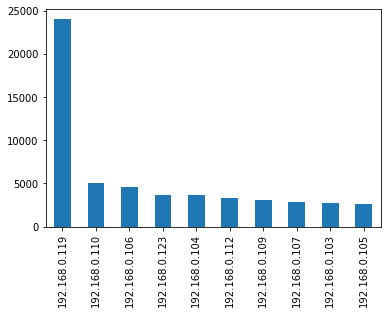

The top three consists of: 
	1) 192.168.0.119 
	2) 192.168.0.110 
	3) 192.168.0.106


In [13]:
top = attack_entries["Source IP"].value_counts().sort_values(ascending=False)
top.head(10).plot.bar()
plt.show()
print("The top three consists of: \n\t1) {p[0]} \n\t2) {p[1]} \n\t3) {p[2]}".format(p=top.head(3).index.tolist()))

The above plot clearly shows that the attacker with IP 192.168.0.119 has send the most packets during the attack. This attacker has probably set the number of threads that are used in the attack to the maximum value. 

Because 192.168.0.119 has sent the majority of packets, ignoring packets from this IP would decrease the strength of the attack by a significant amount. This might be done the next time when an attack of this type is detected, since we have discovered that the attackers use the same IP every time. 

### Source Vendor Distribution
Another measure that might be taken to decrease the strength of these type of attacks is by contacting the manufacturers of the devices that are used in the attack and possibly asking them to decrease the potential for this attack.

The Vendor of a device can be determined by looking up the MAC address. This will then translate to a vendor. Wireshark does this automatically. In the Preprocessing paragraph, the preprocessing for the vendor column has already been touched upon. 

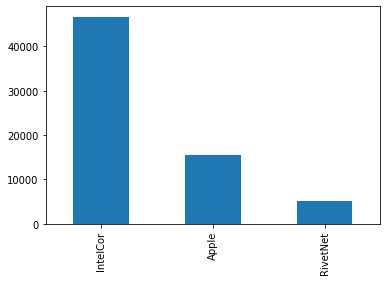

In [14]:
vendors = attack_entries['Vendor'].value_counts().sort_values(ascending=False)
vendors.plot.bar()
plt.show()

The vendor that occurred the most in this attack is 'IntelCor'. This was expected because most of the computers that are sold have this as their Vendor. 'Apple' came in second, which is also expected because of their market share with their Macbooks. The third entry in this plot is a surprise however. A quick lookup on the internet tells that [RivetNet](https://www.rivetnetworks.com/) is a manufacturer for high end networking products that are used for gaming and multimedia. This is probably the device that was used by Jair when he wanted to increase the strength of the attack even further. 

### Source Ports involved in the attack
The source ports used in the attack can be difficult to draw conclusions from, because most likely a lot of ports will be used by the attackers. Therefore the method below creates a range in which the source ports lie by determining the minimum and maximum value of the ports used in the attack. 

In [15]:
min_source_port = attack_entries['Source Port'].min()
max_source_port = attack_entries['Source Port'].max()
print("The Source ports that are used in the attack are in the range between port {} and port {}.".format(int(min_source_port), int(max_source_port)))

The Source ports that are used in the attack are in the range between port 13501 and port 64827.


### TCP Flags involved
The distribution of the TCP flags in the attack might tell more about the nature of the attack. This attack can then in the future be recognized and prevented by taking measures specifically targeted at this type of attack. 

The distribution of TCP flags will be determined by counting the number of occurrences of a TCP Flag in the capture. Then a plot will be generated. 

The Most TCP Flags were send by (PSH, ACK), namely 27339 packets.


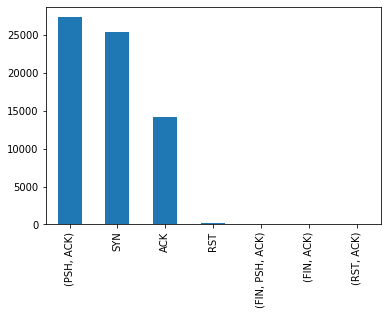

In [16]:
value_counts = attack_entries['TCP Flags'].value_counts()
print("The Most TCP Flags were send by {}, namely {} packets.".format(value_counts.idxmax(), value_counts.max()))
flags = value_counts
flags.plot.bar()
plt.show()

As seen in the plot above, most of the TCP flags are either '(PSH, ACK)', 'SYN' or 'ACK'. The SYN flag is normally only used in the first packet to a new IP connection. That this flag is used so often indicates that it is misused for DDoS purposes. The PSH flag tells the receiver that the packets should be processed instead of buffered, creating even more load on the victim's machine. Finally the ACK signal is used to acknowledge successful receipt of a packet. These are probably the replies to packets that were sent back by the victim's machine to the attackers, as discussed in the Entire Trace section of this notebook. 

### Data Rate
Just as in the Entire Trace section of this notebook, determining the data rate of the attack can grant insight in the severity of the attack and how much is needed to protect against this type of attack. 

This is done in pandas by first casting all the 'Time' Columns to integers instead of doubles. After that, there is the option to group on this time value and sum up all the 'Length' columns for every time value. Now a graph can be made that will show the amount of MB/s at a given time.


The data rate peak was after 28 seconds with 1450888.0 Mbits/second.


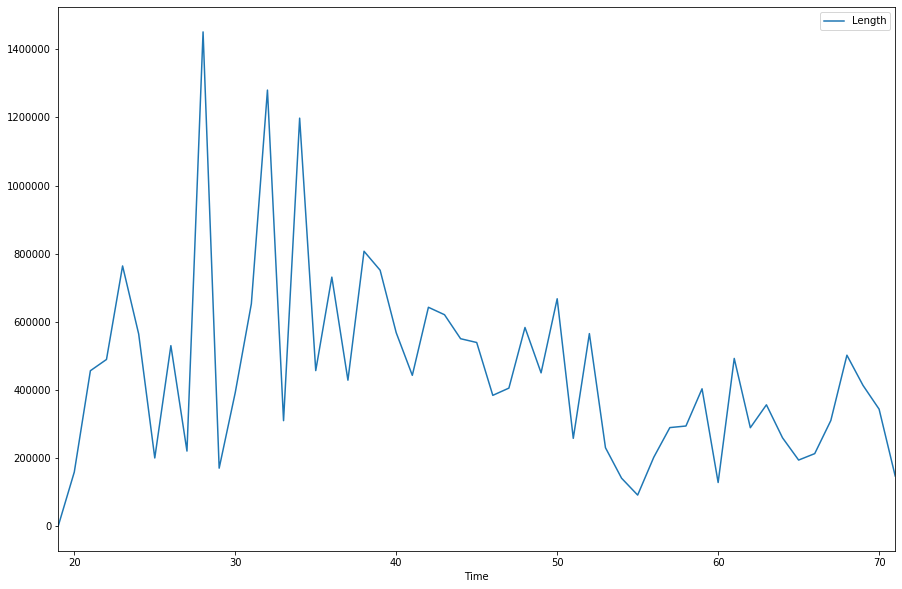

In [17]:
entries = attack_entries
entries['Time'] = entries['Time'].apply(int)
data_rate = entries.groupby(['Time']).sum()
data_rate.plot.line(y='Length', figsize=(15,10))
print("The data rate peak was after {} seconds with {} Mbits/second.".format(data_rate.idxmax()['Length'], data_rate.max()['Length']))
plt.ylabel('')
plt.show()

The above plot shows that at around 30 seconds in the capture file the attack was at its peak. After that the strength declined as more attackers left the attack. 

### Distribution of Packet Length
The packet length can also be analyzed to grant an even better understanding of this attack. The aim of a DDoS attack is to overload the server/device by using as much bandwith as possible. This can be done by sending many large packets, or by sending even more very small packets. 

For this, 5 categories are created to categorize the packets in. These are '<100', '100-500', '500-1000', '1000-1500' and '1500<'. 

The Maximum category (<100) had 45404 packets in it.


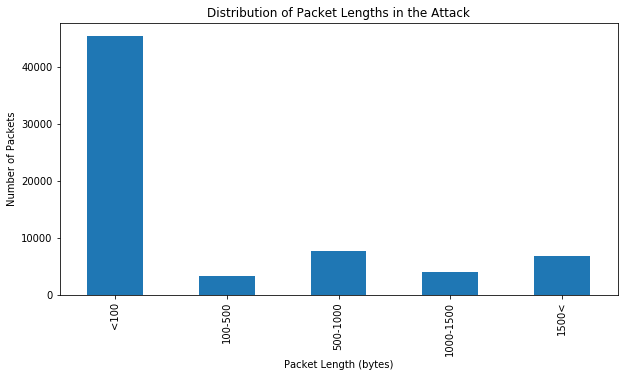

In [18]:
# attack_entries['Length'].value_counts().head(20).plot.bar(figsize=(20, 10))
ranges = [0, 100, 500, 1000, 1500, 20000]
categories = attack_entries.groupby(pd.cut(attack_entries['Length'], ranges, labels=['<100', '100-500', '500-1000', '1000-1500', '1500<'])).count()['Length']
print("The Maximum category ({}) had {} packets in it.".format(categories.idxmax(), categories.max()))
categories.plot.bar(figsize=(10, 5))
plt.xlabel('Packet Length (bytes)')
plt.ylabel('Number of Packets')
plt.title('Distribution of Packet Lengths in the Attack')
plt.show()

Most packets are in the '<100' category, meaning that this attack probably used a lot of small packets to occupy as much bandwith as possible. This also creates an image of the attack which can be used in future prevention of this type of attack. 

## Conclusion
This notebook has provided an analysis on a DDoS attack that was carried out using the Anon Canon application. Using pandas and matplotlib a fingerprint has been formed of an attack that uses TCP to send mostly small packets to a victim with 'PSH, ACK) and SYN flags. This specific attack was targeted at port 80 of victim 192.168.0.100. 17 people have carried out this attack to block all traffic to the victim's machine.

In the future, such an attack can be identified by looking at the characteristics that are described in the sections above. This analysis has proven that the IP addresses that are used to send packets from are not changed throughout the attack. Therefore, blocking these specific IP addresses temporarily would severely limit the capabilities of this type of attack. Also the packets' sources can be easily traced back to a MAC and IP address, closing the net on the attackers and increasing the probability of catching them drastically. 

## References
<div class="cite2c-biblio"></div>

In [19]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>